# <center>Predicting Online News Popularity</center>

# Preliminaries

In [1]:
# import findspark
# import pyspark

# findspark.init()
# findspark.find()   ## SPARK_HOME path

In [1]:
import os
import sys

spark_path = 'C:\\...\\spark-2.4.5-bin-hadoop2.7'

os.environ['SPARK_HOME'] = spark_path
os.environ['HADOOP_HOME'] = spark_path

sys.path.append(spark_path + "/bin")
sys.path.append(spark_path + "/python")
sys.path.append(spark_path + "/python/pyspark/")
sys.path.append(spark_path + "/python/lib")
sys.path.append(spark_path + "/python/lib/pyspark.zip")
sys.path.append(spark_path + "/python/lib/py4j-0.10.7-src.zip")

* Print environment variables.

In [ ]:
import os
print(os.environ['SPARK_HOME'])
print(os.environ['JAVA_HOME'])
# print(os.environ['PATH'])
# print(os.environ['PYSPARK_PYTHON'])

* Before Spark 2.0 we had to create a SparkConf and SparkContext to interact with Spark.
* Now we don't need to create SparkConf, SparkContext or SQLContext, as they’re encapsulated within the `SparkSession` function.

In [3]:
import pyspark   # only run after findspark.init()
from pyspark.sql import SparkSession

spark =  SparkSession.builder.appName("Spark_2nd").getOrCreate()
# spark.newSession()

# Obtaining the Data

* We will use the `Online News Popularity Data Set`, which are available at https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity.

  
* Before reading the file we upload it in the same directory in Anaconda3 where we created this Python folder we work on.


* Now we [*read*](https://spark.apache.org/docs/2.2.0/api/python/pyspark.sql.html) the data. We used the parameter 'inferSchema' in order to infer the input schema automatically from data. We will also used the first line as names of columns.

In [4]:
online_data = spark.read.option("inferSchema", "true").option("header", "true").csv("OnlineNewsPopularity.csv")

In [5]:
import pandas as pd
pd.set_option('display.max_columns', None)  # in order not to truncate the columns
online_data.limit(3).toPandas()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.5,-0.1875,0.0,0.1875,593.0
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.0,0.0000,0.5,0.0000,711.0
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.0,0.0000,0.5,0.0000,1500.0


In [5]:
# total_rows = online_data.count()       # => 39644
# online_data.limit(5).toPandas().shape  # => (5, 61)

In [6]:
print(online_data.toPandas().shape)

(39644, 61)


We observed that almost all column names in the data have a whitespace trail before their names. So we remove it. \
This will be done via the `replace` function. \
For more infromation check the following link: https://spark.apache.org/docs/1.5.0/api/python/pyspark.sql.html#pyspark.sql.DataFrame

In [7]:
online_data.columns[0:4]

['url', ' timedelta', ' n_tokens_title', ' n_tokens_content']

In [8]:
# from pyspark.sql.functions import *
col_names = [x.replace(" ", "") for x in online_data.columns]
online_data = online_data.toDF(*col_names)     # change names in the dataframe

online_data.columns[0:4]

['url', 'timedelta', 'n_tokens_title', 'n_tokens_content']

The purpose is to predict thenumber of shares of an online article (goal field) from the set of features. \
So, we removed the non-predictive attributes from the data ('url' and 'timedelta') and kept:
   * 58 predictive features and
   * 1 goal field ("shares")

In [9]:
online_data = online_data.drop(*['url', 'timedelta']) 
# The * needs to come outside of the brackets if there are multiple columns to drop.
# We use the * operator to pass the contents of your list as arguments to drop():

print(online_data.limit(5).toPandas().shape)

(5, 59)


In [10]:
online_data.limit(3).toPandas()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.5,-0.1875,0.0,0.1875,593.0
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.0,0.0000,0.5,0.0000,711.0
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.0,0.0000,0.5,0.0000,1500.0


## <ins>Comment for partitions</ins>

* Spark breaks the data into *partitions*.

* A partition is a collection of rows that sits on a single computer in your cluster.

In [11]:
print(online_data.toPandas().shape)
print(online_data.rdd.getNumPartitions())

(39644, 59)
6


* The data contain almost 39600 rows, which will split into 6 partitions. that means that approximately every partition will contain 6600 rows. This files are less than 4000 kB, which is  a very reasonable size to analyze.

* Our dataset is considered small so we do not need to further partition the dataframe. For example, if we used 500 partitions this would be an overkill which would lead to slower processing because of scheduling overheads.

* If we analyzed a large dataset, we could further repartition the dataframe.
`The repartition algorithm` does a full shuffle of the data and creates equal sized partitions of data. It can be used to either increase or decrease the number of partitions in a dataframe.

* For example, we could use 100 partitions which in our case would create files with approximately 390 rows each and a size less than 200kB.

* Repartition imporoves performance as it allows us to process data a lot faster.

### => 1st way: Repartition

In [12]:
## 1st way: Repartition

partitioned_data = online_data.repartition(100)
print(partitioned_data.rdd.getNumPartitions())
partitioned_data.write.mode("overwrite").csv("data/online_part.csv", header=True)

100


In [ ]:
## Download this directory
#       !tar czf data.tar.gz data

### => 2nd way: Dynamically Setting the Shuffle Partitions

In [15]:
## 2nd way: Dynamically Setting the Shuffle Partitions
spark.conf.set("spark.sql.shuffle.partitions", 100)

# <center>Random Forest Regression</center>

# Random Forest
* [*Random forests*](https://spark.apache.org/docs/latest/mllib-ensembles.html#random-forests) combine many decision trees in order to reduce the risk of overfitting.

* In particular, the algorithm injects randomness into the training process so that each decision tree is a bit different. 

* The randomness injected into the training process includes:

  * Subsampling the original dataset on each iteration to get a different training set (a.k.a. bootstrapping).
  
  * Considering different random subsets of features to split on at each tree node.

* Combining the predictions from each tree reduces the variance of the predictions, improving the performance on test data.

* In order to perform machine learning tasks in Spark, we will use the MLib library from the `pyspark.ml` package.

[*createOrReplaceTempView*](https://spark.apache.org/docs/2.2.0/api/R/createOrReplaceTempView.html) is used when we want to store a table for a particular spark session. \
It creates (or replaces if that view name already exists) a temporary view using a SparkDataFrame in the Spark Session. \
You can then use like a hive table in Spark SQL and run SQL query on top of that.

In [12]:
online_data.createOrReplaceTempView("online_data")
# online_data.printSchema()

* Algorithms in MLib require that our data is numerical.

* By observing the schema of the dataframe we observed that all variables have been recognized as double datatype. So we dot have to make any transformations.
   * DoubleType: Represents 8-byte double-precision floating point numbers.


In [13]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler

from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator

* As in all Machine Learning tasks, we will split the dataset in two parts, one for training and one for testing.
* We decided to use 70% of the data as training and the remaining 30% as testing.

In [14]:
(training_data, test_data) = online_data.randomSplit([0.7, 0.3])

* Spark ML’s Random Forest class requires that the features are formatted as a single vector. 

* So, before creating and running our model we need to collect all the features in one vector. 

* The features columns are all but the last one.

<ins> Explanation of functions used below:</ins>

* We will use a `VectorAssembler` to create the new column containing the features vector. This takes a list of columns that will be included in the new ‘features’ column.

* Since the two steps of assembling the features and then running the classifier will always need to be performed in this order, we create a `pipeline` to do that. So after splitting tha data into training and test, it creates the "features" column 

* We created a `RandomForestRegressor`, specifying the previously created features via $featuresCol$ parameter and the target columnvia the $labelCol$ parameter.

In [15]:
assembler = VectorAssembler(
    inputCols=[ x for x in online_data.columns[:-1] ],  # remove the goal variable from the feutures
    outputCol='features')

# inputCols=[ x for x in unenc_training_data.columns if x != "shares" ], outputCol='features')

regressor = RandomForestRegressor(labelCol="shares", featuresCol="features")

pipeline = Pipeline().setStages([assembler, regressor])

In [16]:
# We create a model by fitting with the training data.
model = pipeline.fit(training_data)

## Feature Importance
* Interpretability is very important in machine learning. We need to assess the importance of each input feature to making predictions in order to understand which features were most important to the outcomes.

* The function `featureImportances` establishes a percentage of how influential each feature is on the model’s predictions. We therefore take each feature importance with the corresponding column and we print them out.

* Remember that we have run a pipeline; the pipeline had two stages, a `VectorAssembler` and a `DecisionTreeRegressor`.

* Therefore we'll extract the last stage of the pipeline, to get the parameters in a dictionary containing hyperparameters and their values.

In [17]:
import pandas as pd   
model1b = model.stages[-1]

imp_feat = []
for feature, name in sorted(zip(model1b.featureImportances, training_data.columns), reverse=True):
    imp_feat.append((feature, name))
    
features_imp11 = pd.DataFrame(imp_feat, columns=['Importance','feature'])
# features_imp11.head(6)
features_imp11.iloc[list(range(5))+list(range(-5,0))]  # 5 first most important and 5 least important features

,Importance,feature
0,0.075811,num_hrefs
1,0.058339,average_token_length
2,0.053890,n_tokens_title
3,0.050870,avg_negative_polarity
4,0.048769,self_reference_avg_sharess
53,0.000009,data_channel_is_world
54,0.000000,weekday_is_tuesday
55,0.000000,weekday_is_thursday
56,0.000000,weekday_is_friday
57,0.000000,max_positive_polarity


<ins>Comment</ins>
It looks like the following attributes are the most important predictors of the number of shares. 

| Attribute | Attribute Information | 
|----------------|-------|
| num_hrefs |  Number of links | 
| average_token_length |  Average length of the words in the content | 
| n_tokens_title |  Number of words in the title | 
| avg_negative_polarity |  Avg. polarity of negative words | 
| self_reference_avg_sharess |  Avg. shares of referenced articles in Mashable | 

* For better undrestanding we will also created a plot showing the ten most important features in the data.

Text(0.5, 1.0, '10 Most important features')

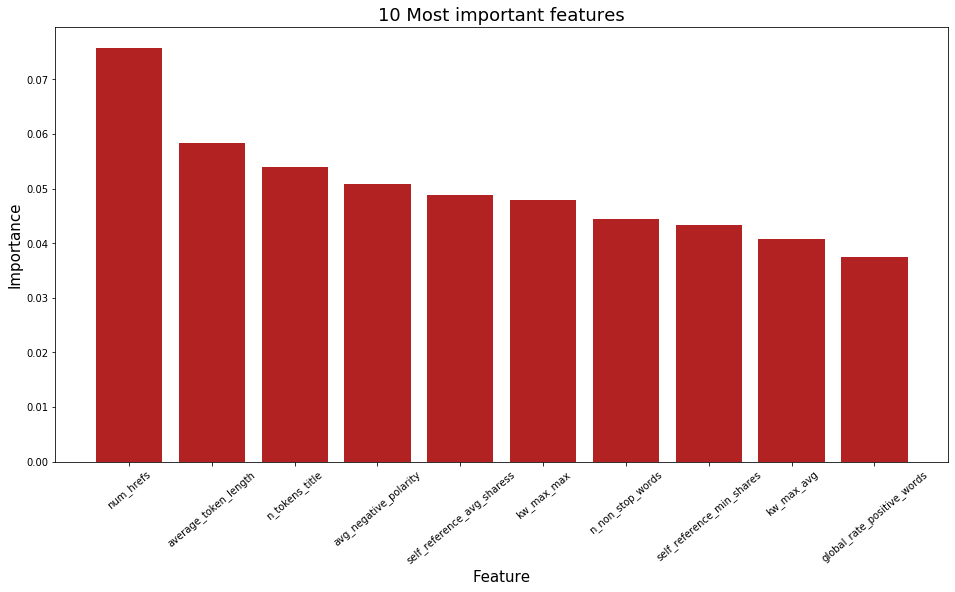

In [18]:
# Plot the feature importances of the forest

import matplotlib.pyplot as plt 
plt.figure(figsize=(16,8))

plot_data = features_imp11.head(10)


importances = plot_data.Importance
val = list(range(len(importances)))

plt.bar(val, importances, color="firebrick", align="center")   # or:  orientation = 'vertical'
plt.xticks(val, plot_data.feature, rotation=40)

plt.ylabel('Importance', fontsize=15)
plt.xlabel('Feature', fontsize=15)
plt.title('10 Most important features', fontsize=18)

* Having created a random forest, we make our predictions using `transform()`.

In [22]:
predictions = model.transform(test_data)

* <ins>Some optimization</ins>: In principle we are recomputing all transformations every time.

* In order to re-use the previously computed predictions (transformations) we have performed, we can cache the results in memory using `caching`.

* Caching is an optimization technique for interactive and iterative Spark computations. It helps to save intermediate results so we can reuse them in subsequent stages.

In [23]:
predictions.cache()

DataFrame[n_tokens_title: double, n_tokens_content: double, n_unique_tokens: double, n_non_stop_words: double, n_non_stop_unique_tokens: double, num_hrefs: double, num_self_hrefs: double, num_imgs: double, num_videos: double, average_token_length: double, num_keywords: double, data_channel_is_lifestyle: double, data_channel_is_entertainment: double, data_channel_is_bus: double, data_channel_is_socmed: double, data_channel_is_tech: double, data_channel_is_world: double, kw_min_min: double, kw_max_min: double, kw_avg_min: double, kw_min_max: double, kw_max_max: double, kw_avg_max: double, kw_min_avg: double, kw_max_avg: double, kw_avg_avg: double, self_reference_min_shares: double, self_reference_max_shares: double, self_reference_avg_sharess: double, weekday_is_monday: double, weekday_is_tuesday: double, weekday_is_wednesday: double, weekday_is_thursday: double, weekday_is_friday: double, weekday_is_saturday: double, weekday_is_sunday: double, is_weekend: double, LDA_00: double, LDA_01:

* We observed that a predicted column was created at the end of the dataframe.
* In order to compute the $RMSE$ later on we need both the actual and the predicted value. Some of their values are shown below in contract:

In [24]:
predictions.select("shares", "prediction").limit(5).toPandas()

,shares,prediction
0,2300.0,2858.645512
1,3100.0,2450.950796
2,2600.0,2310.074755
3,2700.0,3806.269104
4,7800.0,2886.848617


### Understanding the `feautures` column

### <ins>Example 1</ins>:

* We can also understand now how the `features` column is represented.

* For example if we see the first row in the dataframe below we understand that in the `features` column:
  
  * The first element is `n_tokens_title`.
  
  * The second element is `n_tokens_content` etc.

In [25]:
predictions.select("n_tokens_title","n_tokens_content", "features").limit(5).toPandas()

,n_tokens_title,n_tokens_content,features
0,4.0,98.0,"[4.0, 98.0, 0.670212758828, 0.999999980392, 0...."
1,4.0,275.0,"[4.0, 275.0, 0.61538461313, 0.999999993671, 0...."
2,4.0,297.0,"[4.0, 297.0, 0.613013696531, 0.999999994318, 0..."
3,5.0,179.0,"[5.0, 179.0, 0.668539322087, 0.999999990385, 0..."
4,5.0,212.0,"[5.0, 212.0, 0.665024627266, 0.999999992481, 0..."


### <ins>Example 2</ins>:
We observed that the variables refer to data_channel are six boolean variables. Let's show how these will be represented in the as a vector which will be used for all the machine learning tasks.

In [30]:
from pyspark.ml.feature import VectorAssembler

data_channel = ["data_channel_is_lifestyle", "data_channel_is_entertainment", "data_channel_is_bus","data_channel_is_socmed", \
               "data_channel_is_tech", "data_channel_is_world"]

vector_assembler3 = VectorAssembler()\
  .setInputCols(data_channel)\
  .setOutputCol("data_channel_encoded")

from pyspark.ml import Pipeline
transformation_pipeline1 = Pipeline().setStages([vector_assembler3])

In [32]:
fitted_pipeline1 = transformation_pipeline1.fit(online_data)
data_temp1 = fitted_pipeline1.transform(online_data)

print(online_data.toPandas().shape,"  =>  ",data_temp1.toPandas().shape)

(39644, 59)   =>   (39644, 60)


In [34]:
data_temp1.select("data_channel_is_lifestyle", "data_channel_is_entertainment", "data_channel_is_bus", "data_channel_is_socmed", \
                   "data_channel_is_tech","data_channel_is_world", "data_channel_encoded").limit(3).toPandas()

,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,data_channel_encoded
0,0.0,1.0,0.0,0.0,0.0,0.0,"(0.0, 1.0, 0.0, 0.0, 0.0, 0.0)"
1,0.0,0.0,1.0,0.0,0.0,0.0,"(0.0, 0.0, 1.0, 0.0, 0.0, 0.0)"
2,0.0,0.0,1.0,0.0,0.0,0.0,"(0.0, 0.0, 1.0, 0.0, 0.0, 0.0)"


* It is obvious that the information in the last column, contains all the encoded information of the six columns in just one vector.
* For example we understand from the last column that:
    * In the first row: The data channel is 'Entertainment' (the 2rd value equals to one and all the other values equal to zero)
    * In the second row: The data channel is 'Business'  (the 3rd value equals to one and all the other values equal to zero) etc.

* <font size="3">We will also calculate the Root Mean Squared Error (RMSE) of the model predictions, by using the `RegressionEvaluator` function.</font>

In [36]:
# Evaluate model
# Root mean squared error

from pyspark.ml.evaluation import RegressionEvaluator
evaluator = RegressionEvaluator(metricName="rmse", predictionCol="prediction", labelCol="shares")

rmse = evaluator.evaluate(predictions)
print("RMSE = %g" % rmse)

RMSE = 10475.7


# <center>Hyperparameter tuning</center>

### BEST HYPERPARAMETERS
* We will investigate which parameters performed best, by using *grid search*.
* The [*hyperparameters*](https://spark.apache.org/docs/latest/api/scala/#org.apache.spark.ml.regression.RandomForestRegressor) of the random forest regressor that we want to optimize are:
    * maxDepth: maximum depth of the tree
    * maxBins:  maximum number of bins
    * minInfoGain: minimum information gain for a split to be considered at a tree node
    * numTrees: Number of trees to train (at least 1). If greater than 1, then bootstrapping is done

* We specified the The set of possible values for the hyperparameters, which was chosen based on experience and trial and error practices.

* We used two possible values for each of the four afforementioned hyperparameters, which means that Spark will check 16 different models; grid search may require *a lot* of time.

* The "best model" is considered the one which had the highest performance for the given parameters.

In [23]:
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.tuning import ParamGridBuilder
from pyspark.ml.tuning import CrossValidator
from pyspark.ml.evaluation import RegressionEvaluator

In [24]:
from pyspark.ml.tuning import ParamGridBuilder

param_grid = ParamGridBuilder().\
    addGrid(regressor.maxDepth, [2, 20]).\
    addGrid(regressor.maxBins, [40, 300]).\
    addGrid(regressor.minInfoGain, [0.0, 0.05]).\
    addGrid(regressor.numTrees, [1, 10]).\
    build()

In [ ]:
# param_grid = (ParamGridBuilder()
#               .addGrid(regressor.maxDepth, [2, 20])
#               .addGrid(regressor.maxBins, [40, 300])
#               .addGrid(regressor.minInfoGain, [0.0, 0.05])
#               .addGrid(regressor.numTrees, [1, 10])
#             .build())

In [ ]:
#  from pyspark.ml.evaluation import RegressionEvaluator
#  evaluator = RegressionEvaluator(metricName="rmse", predictionCol="prediction", labelCol="shares")

## 1st way: TrainValidationSplit

* For each model (set of hyperparameters) we will also perform a testing and evaluation, in order to find the best one.

* So we use `TrainValidationSplit`, which will use 90% of the training dataset for training and 10% for evaluation.

In [26]:
from pyspark.ml.tuning import TrainValidationSplit

# And we'll also do validation through training, again with a 90-10 ratio.
validator = TrainValidationSplit().\
    setEstimator(pipeline).\
    setEvaluator(evaluator).\
    setEstimatorParamMaps(param_grid).\
    setTrainRatio(0.9)

* We create a model by fitting with the training data.

* To find the model that performed best in our parameter grid, we use the `bestModel` attribute of the model.

* We can also get the whole information for the hyperparameter values that were found for the best model.

* Remember that we have run a pipeline; the pipeline had two stages, a `VectorAssembler` and a `DecisionTreeRegressor`.

* Therefore we'll extract the last stage of the pipeline via the `extractParamMap` function, to get the hyperparameters and their values.

In [29]:
validator_model = validator.fit(training_data)
best_model = validator_model.bestModel
params = best_model.stages[-1].extractParamMap()

In [30]:
for param, value in params.items():
        print(f'{param.name}: {value}')

cacheNodeIds: False
checkpointInterval: 10
featureSubsetStrategy: auto
featuresCol: features
impurity: variance
labelCol: shares
maxBins: 40
maxDepth: 2
maxMemoryInMB: 256
minInfoGain: 0.0
minInstancesPerNode: 1
numTrees: 10
predictionCol: prediction
seed: -7358761183697819999
subsamplingRate: 1.0


* So, regarding the values of the hyperparameters we chose to examine we saw that:
    
| Hyperparameter | best value | possible values |
|----------------|-------|--------|
| maxDepth |  2 |  [2, 20] | 
| maxBins |  40 |  [40, 300] | 
| minInfoGain |  0.0 | [0.0, 0.05] | 
| numTrees |  10 |  [1, 10] | 

## 2nd way: k-fold validation (k=5)

`5-fold cross validation`: \
It randomly divides the data into 5 groups (aka folds) of approximately equal size. The first fold is treated as a test set and the statistical method is fit on the remaining data. 

The root mean square error (RMSE) is then computed on the observations in the held-out fold. This procedure is repeated five times. The 5-fold CV estimate is computed by averaging the RMSE estimates.

<font size="4"><b><ins>Note</ins>:</b> For practice purposes we will implement CrossValidation without using the pipeline</font>

In [39]:
assembler = VectorAssembler(inputCols=[ x for x in online_data.columns[:-1] ],  outputCol='features')

data_final = assembler.transform(online_data)

In [40]:
data_final.cache()

DataFrame[n_tokens_title: double, n_tokens_content: double, n_unique_tokens: double, n_non_stop_words: double, n_non_stop_unique_tokens: double, num_hrefs: double, num_self_hrefs: double, num_imgs: double, num_videos: double, average_token_length: double, num_keywords: double, data_channel_is_lifestyle: double, data_channel_is_entertainment: double, data_channel_is_bus: double, data_channel_is_socmed: double, data_channel_is_tech: double, data_channel_is_world: double, kw_min_min: double, kw_max_min: double, kw_avg_min: double, kw_min_max: double, kw_max_max: double, kw_avg_max: double, kw_min_avg: double, kw_max_avg: double, kw_avg_avg: double, self_reference_min_shares: double, self_reference_max_shares: double, self_reference_avg_sharess: double, weekday_is_monday: double, weekday_is_tuesday: double, weekday_is_wednesday: double, weekday_is_thursday: double, weekday_is_friday: double, weekday_is_saturday: double, weekday_is_sunday: double, is_weekend: double, LDA_00: double, LDA_01:

In [41]:
(training_data, test_data) = data_final.randomSplit([0.7, 0.3])

In [42]:
regressor = RandomForestRegressor(labelCol="shares", featuresCol="features")

from pyspark.ml.evaluation import RegressionEvaluator
evaluator = RegressionEvaluator(metricName="rmse", predictionCol="prediction", labelCol="shares")

In [43]:
cv24 = CrossValidator(estimator = regressor,
                      estimatorParamMaps = param_grid,
                      evaluator = evaluator,
                      numFolds = 5)

In [44]:
cv24_model = cv24.fit(training_data)

In [46]:
best_model24 = cv24_model.bestModel

# params24 = best_model24.stages[-1].extractParamMap()
params24 = best_model24.extractParamMap()

for param, value in params24.items():
        print(f'{param.name}: {value}')

cacheNodeIds: False
checkpointInterval: 10
featureSubsetStrategy: auto
featuresCol: features
impurity: variance
labelCol: shares
maxBins: 40
maxDepth: 2
maxMemoryInMB: 256
minInfoGain: 0.0
minInstancesPerNode: 1
numTrees: 10
predictionCol: prediction
seed: -7358761183697819999
subsamplingRate: 1.0


In [47]:
print('maxDepth - ', best_model24.getOrDefault('maxDepth'))
print('maxDepth - ', best_model24.getOrDefault('maxBins'))
print('maxDepth - ', best_model24.getOrDefault('minInfoGain'))
print('numTrees - ', best_model24.getNumTrees)

maxDepth -  2
maxDepth -  40
maxDepth -  0.0
numTrees -  10


* So, regarding the values of the hyperparameters we chose to examine we saw that:
    
| Hyperparameter | best value | possible values |
|----------------|-------|--------|
| maxDepth |  2 |  [2, 20] | 
| maxBins |  40 |  [40, 300] | 
| minInfoGain |  0.0 | [0.0, 0.05] | 
| numTrees |  10 |  [1, 10] | 


<font size="4"><b><ins>Comment</ins>:</b> The results are the same produced with the TrainValidationSplit method.</font>

## Model evaluation after tuning with the best hyperparameters

We will examine how the model with the selected best hyperameters perfoms in the test data.

## => 1st way: Direct use of the best model

In [48]:
# evaluator = RegressionEvaluator(metricName="rmse", predictionCol="prediction", labelCol="shares")

predictions33 = best_model.transform(test_data)
rmse33 = evaluator.evaluate(predictions33)

## => 2nd way: Tune manually the hyperparameters of the model

In [53]:
assembler2 = VectorAssembler(inputCols=[ x for x in online_data.columns[:-1] ], outputCol='features')
regressor2 = RandomForestRegressor(labelCol="shares",featuresCol="features",maxDepth=2,maxBins=40,minInfoGain=0.0, numTrees=10)
pipeline2 = Pipeline().setStages([assembler2, regressor2])

model2 = pipeline2.fit(training_data)
predictions2 = model2.transform(test_data)   

In [54]:
evaluator = RegressionEvaluator(metricName="rmse", predictionCol="prediction", labelCol="shares")
rmse22 = evaluator.evaluate(predictions2)
print("RMSE = %g" % rmse22)

RMSE = 10321.3


# EVALUATION
In order to see how accurately the model predicts the response we used the Root Mean Squared Error (RMSE), which measures the average prediction error made by the model in predicting the outcome for an observation. That is, the average difference between the observed values and the model’s predicted values.


* Lower values of RMSE indicate better fit, as it results in small deviations between the predicted and the actual values. 

* RMSE has the same units as the dependent variable while MSE has squared units. That means that there is no absolute “good” value of RMSE, however it can be defined based on the dependent variable. 

* RMSE is quite similar to the standard deviation (SD). Instead of measuring how much the responses vary from the mean, it uses essentially the same formula to measure how much the responses vary from the model's predictions. 

* A good model should, on average, have better predictions than the naïve estimate of the mean for all predictions. Thus, the RMSE should reduce the randomness better than the SD. 
So, by comparing the MSE to the sample variance of the responses we can see how much more variation we have explained with our model. 

# Summary and Descriptive Statistics of the target variable

For numerical columns, knowing the descriptive summary statistics can help a lot in understanding the distribution of your data. 

We will use the describe function, which returns a DataFrame containing information such as number of non-null entries (count), mean, standard deviation, and minimum and maximum value for each numerical column.

In [55]:
online_data.describe('shares').toPandas()

,summary,shares
0,count,39644
1,mean,3395.3801836343455
2,stddev,11626.950748651709
3,min,1.0
4,max,843300.0


* After completing our analysis, we stop the Spark Session.

In [59]:
# In the end, stop the session
spark.stop()

In [ ]:
# xwris hyperparameters: RMSE = 10475.7
# me hyperparameters: RMSE = 10321.3
### RMSE = 10321.3  | stddev = 11626 .9    |    range = (1, 843300)

# <center><ins>Conclusion</ins></center>

* First of all we observed that after using the optimal hyperparameters proposed by our research the value of RMSE was smaller.


* Based on range of the number of shares we may characterize the RMSE as small, and thus identify our predictions as "good". 


* <ins>Note</ins>: Range is sometimes misleading because we could have a skewed distribution or outliers, so we will also use the standard deviation, which takes care of this. 


* The RMSE is smaller that the standard deviation, which means that we have explained more variation with our model and thus this is another indication that our predictions are worthwhile.